# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

In [3]:
Amazon_credits = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/AmazonPrimeData/credits.csv")
Amazon_titles = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/AmazonPrimeData/titles.csv")
Disney_credits = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/DisneyData/credits.csv")
Disney_titles = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/DisneyData/titles.csv")
HBO_credits = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/HBOData/credits.csv")
HBO_titles = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/HBOData/titles.csv")
Hulu_credits = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/HuluData/credits.csv")
Hulu_titles = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/HuluData/titles.csv")
Netflix_credits = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/NetflixData/credits.csv")
Netflix_titles = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/NetflixData/titles.csv")
Paramount_credits = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/ParamountData/credits.csv")
Paramount_titles = pd.read_csv(r"C://Users/lizzc/Desktop/LaunchCode/VideoStreamingData/ParamountData/titles.csv")


##### Notes on ratings/popularity info

IMDB ratings are a user rating between 0 and 10.

IMDB votes are the number of ratings a show has recieved.

TMDB ratings are a user rating between 0 and 10.

Info about tmdb popularity score: https://developers.themoviedb.org/3/getting-started/popularity  

I wasn't sure what this was, so I looked it up. The description says it's a data model using these metrics:  

Movies  
Number of votes for the day  
Number of views for the day  
Number of users who marked it as a "favourite" for the day  
Number of users who added it to their "watchlist" for the day  
Release date  
Number of total votes  
Previous days score  

TV Shows  
Number of votes for the day  
Number of views for the day  
Number of users who marked it as a "favourite" for the day  
Number of users who added it to their "watchlist" for the day  
Next/last episode to air date  
Number of total votes  
Previous days score  

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

### Step 1
I am running describe, head, and isnull on each dataframe to get a feel for what information is and isn't fully filled in and to get a feel for what I might drop and if I need to do anything before concatenating them. While I do this, I will run a few other quick scenarios as needed to see what's up with the data, taking notes as I do.


In [4]:
Amazon_credits.describe().round(2)

,person_id
count,124235.00
mean,406473.68
std,561629.65
min,1.00
25%,38992.00
50%,133949.00
75%,571256.00
max,2371153.00


This is not useful since it's an id, not a number we care about, so I dropped describe for the other credits.

In [5]:
Amazon_credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [6]:
Amazon_credits.isnull().sum() 

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

I notice there are a lot of character names missing. Is this because they were unnamed characters or because they were directors, etc?

In [7]:
Amazon_credits["role"].value_counts()

ACTOR       115846
DIRECTOR      8389
Name: role, dtype: int64

It looks like the directors count is only about half of the missing character names, which means those are probably unnamed characters. I might look further into that later and decide if I want to rename that to unnamed for any that aren't marked as directors.

In [8]:
Amazon_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


I'm not sure this is that valuable here. I might run it to make sure I won't have issues with different data types when concatenating. Or I might just try to concatenate and come back to it if I run into issues.

In [9]:
Amazon_titles.describe().round(2)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.00,9871.00,1357.00,8850.00,8840.00,9324.00,7789.00
mean,2001.33,85.97,2.79,5.98,8533.61,6.91,5.98
std,25.81,33.51,4.15,1.34,45920.15,30.00,1.52
min,1912.00,1.00,1.00,1.10,5.00,0.00,0.80
25%,1995.50,65.00,1.00,5.10,117.00,1.23,5.10
50%,2014.00,89.00,1.00,6.10,462.50,2.54,6.00
75%,2018.00,102.00,3.00,6.90,2236.25,5.63,6.90
max,2022.00,549.00,51.00,9.90,1133692.00,1437.91,10.00


Useful Amazon titles info from describe:

Median year: 2014 (Using this instead of mean because mean would skew lower.)  
Min year: 1912  
25% percentile: 1995  
Max year: 2022  

Runtimes are between 1 minute and 549 minutes (about 9 hours)  
Mean runtime: 86 minutes(about 1.5 hours)  
Median runtime: 89 minutes (about 1.5 hours)  

Mean imdb score: 5.98  
Median: 6.10  
Min/max: 1.1 / 9.9  

Mean imdb votes: 8533  
Median votes: 462  
Min/max: 5 / 1133692  

Mean tmdb score: 5.98  
Median: 6.00  
Min/max: .8 / 10  

Mean tmdb popularity: 6.91  
Median: 2.54  
Min/max: 0 / 1437.91  

Thoughts:  
Might want to drop data below a certain runtime. Not sure there is much useful  to be learned about a 1 minute piece.  

Looks like most videos (75%) are after 1995. Might be worth breaking out info on the older movies separately. Not sure if 1995 is the right place or if I might even go a little more modern, like last 10 years vs. more than a decade old.  

Curious what show has 51 seasons. That's a lot. Seasons data will be more useful if I can find a way to eliminate movies from the mix for that info. Hard to tell if that's already the case here.

Will pull this info for the other titles dataframes as an easy reference. 

In [10]:
Amazon_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [11]:
Amazon_titles.isnull().sum() 

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [12]:
Amazon_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [13]:
Disney_credits.head()

,person_id,id,name,character,role
0,23433,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR
1,5910,tm74391,Walt Disney,Mickey Mouse (segment 'The Sorcerer's Apprenti...,ACTOR
2,23436,tm74391,Julietta Novis,Soloist (segment 'Ave Maria') (singing voice),ACTOR
3,23434,tm74391,Leopold Stokowski,Himself - Conductor of The Philadelphia Orchestra,ACTOR
4,23441,tm74391,Paul Satterfield,NaN,DIRECTOR


In [14]:
Disney_credits.isnull().sum() 

person_id       0
id              0
name            0
character    1643
role            0
dtype: int64

In [15]:
Disney_titles.describe().round(2)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1535.00,1535.00,415.00,1108.00,1105.00,1524.00,1426.00
mean,2003.58,60.16,2.58,6.61,76350.04,40.24,6.92
std,21.68,39.90,3.01,1.07,188589.31,263.15,1.02
min,1928.00,1.00,1.00,1.60,5.00,0.60,1.00
25%,1999.00,23.00,1.00,5.90,490.00,3.87,6.30
50%,2012.00,53.00,2.00,6.60,4219.00,9.38,6.90
75%,2019.00,93.00,3.00,7.40,41639.00,25.44,7.50
max,2022.00,182.00,34.00,9.70,1353907.00,9323.83,10.00


Useful Disney titles info from describe:

Median year: 2012 (Using this instead of mean because mean would skew lower.)  
Min year: 1928  
25% percentile: 1999  
Max year: 2022  

Runtimes are between 1 minute and 182 minutes (about 3 hours)  
Mean runtime: 60 minutes(about 1 hour)  
Median runtime: 53 minutes (about 1 hour)  

Mean imdb score: 6.61  
Median: 6.60  
Min/max: 1.6 / 9.7  

Mean imdb votes: 76350  
Median votes: 4219  
Min/max: 5 / 1353907  

Mean tmdb score: 6.92  
Median: 6.90  
Min/max: 1 / 10  

Mean tmdb popularity: 40.24  
Median: 9.38  
Min/max: 0.6 / 9323.83  

In [16]:
Disney_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


In [17]:
Disney_titles.isnull().sum() 

id                         0
title                      0
type                       0
description                6
release_year               0
age_certification        325
runtime                    0
genres                     0
production_countries       0
seasons                 1120
imdb_id                  402
imdb_score               427
imdb_votes               430
tmdb_popularity           11
tmdb_score               109
dtype: int64

In [18]:
HBO_credits.head()

,person_id,id,name,character,role
0,60017,tm155702,Judy Garland,Dorothy Gale,ACTOR
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow,ACTOR
2,79549,tm155702,Jack Haley,Hickory / Tin Man,ACTOR
3,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion,ACTOR
4,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West,ACTOR


In [19]:
HBO_credits.isnull().sum() 

person_id       0
id              0
name            0
character    4505
role            0
dtype: int64

In [20]:
HBO_titles.describe().round(2)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,3294.00,3294.00,756.00,2922.00,2911.00,3261.00,3026.00
mean,2001.19,80.91,3.00,6.88,64618.35,21.11,6.85
std,23.54,38.48,3.65,1.06,175461.67,89.14,1.08
min,1901.00,1.00,1.00,1.50,5.00,0.05,1.00
25%,1995.00,51.25,1.00,6.30,924.50,3.45,6.20
50%,2010.00,89.00,2.00,7.00,8071.00,8.56,6.90
75%,2018.00,106.00,4.00,7.60,47645.00,17.71,7.50
max,2022.00,255.00,52.00,9.40,2555504.00,4447.89,10.00


Useful HBO titles info from describe:

Median year: 2010 (Using this instead of mean because mean would skew lower.)  
Min year: 1901  
25% percentile: 1995  
Max year: 2022  

Runtimes are between 1 minute and 255 minutes (about 4.25 hours)  
Mean runtime: 80 minutes(about 1.5 hours)  
Median runtime: 89 minutes (about 1.5 hours)  

Mean imdb score: 6.88  
Median: 7.00  
Min/max: 1.5 / 9.4  

Mean imdb votes: 64618.35  
Median votes: 8071  
Min/max: 5 / 2555504  

Mean tmdb score: 6.85  
Median: 6.90  
Min/max: 1 / 10  

Mean tmdb popularity: 21.11  
Median: 8.56  
Min/max: 0.05 / 4447.89  

In [21]:
HBO_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8


In [22]:
HBO_titles.isnull().sum() 

id                         0
title                      0
type                       0
description               12
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64

In [23]:
Hulu_credits.head()

,person_id,id,name,character,role
0,85144,ts20475,Aidy Bryant,Self - Various Characters,ACTOR
1,85141,ts20475,Michael Che,Self - Various Characters,ACTOR
2,87723,ts20475,Pete Davidson,Self - Various Characters,ACTOR
3,99154,ts20475,Mikey Day,Self - Various Characters,ACTOR
4,26921,ts20475,Colin Jost,Self - Various Characters,ACTOR


In [24]:
Hulu_credits.isnull().sum() 

person_id       0
id              0
name            0
character    2226
role            0
dtype: int64

In [25]:
Hulu_titles.describe().round(2)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,2398.00,2398.00,1330.00,2232.00,2231.00,2348.00,2238.00
mean,2013.42,61.52,3.94,6.70,28286.88,27.87,6.89
std,8.48,35.10,5.02,1.21,78020.10,92.00,1.22
min,1951.00,0.00,1.00,1.00,5.00,0.27,1.00
25%,2010.00,25.00,1.00,5.90,621.50,4.79,6.10
50%,2016.00,48.00,2.00,6.80,3451.00,10.70,7.00
75%,2019.00,93.00,5.00,7.60,17056.00,23.91,7.70
max,2022.00,229.00,63.00,9.50,996056.00,2989.85,10.00


Useful Hulu titles info from describe:

Median year: 2016 (Using this instead of mean because mean would skew lower.)  
Min year: 1951  
25% percentile: 2010  
Max year: 2022  

Runtimes are between 0 minute and 229 minutes (about 4 hours)  
Mean runtime: 61.52 minutes(about 1 hour)  
Median runtime: 48 minutes (about .75 hours)  

Mean imdb score: 6.7  
Median: 6.8  
Min/max: 1 / 9.5  

Mean imdb votes: 28286.88  
Median votes: 3451  
Min/max: 5 / 996056  

Mean tmdb score: 6.89  
Median: 7  
Min/max: 1 / 10  

Mean tmdb popularity: 27.87  
Median: 10.7  
Min/max: .27 / 2989.85  

In [26]:
Hulu_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20475,Saturday Night Live,SHOW,A late-night live television sketch comedy and...,1975,TV-14,89,"['music', 'comedy']",['US'],47.0,tt0072562,8.0,47910.0,54.345,6.9
1,ts20413,M*A*S*H,SHOW,The 4077th Mobile Army Surgical Hospital is st...,1972,TV-PG,26,"['war', 'comedy', 'drama']",['US'],11.0,tt0068098,8.4,55882.0,27.308,8.0
2,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,tt0043208,8.5,25944.0,17.088,8.1
3,ts20669,Taxi,SHOW,"Louie De Palma is a cantankerous, acerbic taxi...",1978,TV-PG,25,"['drama', 'comedy']",['US'],5.0,tt0077089,7.7,13379.0,14.346,7.3
4,ts21049,The Mary Tyler Moore Show,SHOW,30-year-old single Mary Richards moves to Minn...,1970,TV-PG,28,['comedy'],['US'],7.0,tt0065314,8.2,8692.0,9.290,7.5


In [27]:
Hulu_titles.isnull().sum() 

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification        685
runtime                    0
genres                     0
production_countries       0
seasons                 1068
imdb_id                  135
imdb_score               166
imdb_votes               167
tmdb_popularity           50
tmdb_score               160
dtype: int64

In [28]:
Netflix_credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [29]:
Netflix_credits.isnull().sum() 

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [30]:
Netflix_titles.describe().round(2)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.00,5806.00,2047.00,5283.00,5267.00,5712.00,5488.00
mean,2016.01,77.64,2.17,6.53,23407.19,22.53,6.82
std,7.32,39.47,2.64,1.16,87134.32,68.85,1.17
min,1945.00,0.00,1.00,1.50,5.00,0.01,0.50
25%,2015.00,44.00,1.00,5.80,521.00,3.16,6.10
50%,2018.00,84.00,1.00,6.60,2279.00,7.48,6.90
75%,2020.00,105.00,2.00,7.40,10144.00,17.78,7.50
max,2022.00,251.00,42.00,9.60,2268288.00,1823.37,10.00


Useful Netflix titles info from describe:

Median year: 2018 (Using this instead of mean because mean would skew lower.)  
Min year: 1945  
25% percentile: 2015  
Max year: 2022  

Runtimes are between 0 minute and 251 minutes (about 4.25 hours)  
Mean runtime: 77.64 minutes(about 1.25 hours)  
Median runtime: 84 minutes (about 1.5 hours)  

Mean imdb score: 6.53  
Median: 6.6  
Min/max: 1.5 / 9.6  

Mean imdb votes: 23407.19   
Median votes: 2279  
Min/max: 5 / 2268288  

Mean tmdb score: 6.82  
Median: 6.9  
Min/max: .5 / 10  

Mean tmdb popularity: 22.53  
Median: 7.48  
Min/max: .01 / 1823.37  

In [31]:
Netflix_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [32]:
Netflix_titles.isnull().sum() 

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [33]:
Paramount_credits.head()

,person_id,id,name,character,role
0,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
1,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
2,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
3,28715,tm19248,Jim Farley,General Thatcher,ACTOR
4,27348,tm19248,Frederick Vroom,A Southern General,ACTOR


In [34]:
Paramount_credits.isnull().sum() 

person_id       0
id              0
name            0
character    3113
role            0
dtype: int64

In [35]:
Paramount_titles.describe().round(2)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,2825.00,2825.00,626.00,2613.00,2613.00,2768.00,2337.00
mean,1990.70,72.25,3.98,6.04,22238.76,13.04,6.05
std,31.39,30.07,5.41,1.28,115823.22,96.29,1.48
min,1912.00,1.00,1.00,1.70,5.00,0.01,1.00
25%,1965.00,48.00,1.00,5.30,148.00,1.27,5.10
50%,2007.00,75.00,2.00,6.10,548.00,2.62,6.10
75%,2017.00,93.00,4.00,7.00,3092.00,6.96,7.00
max,2022.00,228.00,49.00,9.40,1994599.00,4579.16,10.00


Useful Paramount titles info from describe:

Median year: 2007 (Using this instead of mean because mean would skew lower.)  
Min year: 1912  
25% percentile: 1965  
Max year: 2022  

Runtimes are between 1 minute and 228 minutes (about 4 hours)  
Mean runtime: 72.25 minutes(about 1.25 hours)  
Median runtime: 75 minutes (about 1.25 hours)  

Mean imdb score: 6.04  
Median: 6.1  
Min/max: 1.7 / 9.4  

Mean imdb votes: 22238.76  
Median votes: 548  
Min/max: 5 / 1994599  

Mean tmdb score: 6.05  
Median: 6.1  
Min/max: 1 / 10  

Mean tmdb popularity: 13.04  
Median: 2.62  
Min/max: .01 / 4579.16  

In [36]:
Paramount_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,NaN,197,"['history', 'drama']",['US'],NaN,tt0006864,7.7,15242.0,9.412,7.2


In [37]:
Paramount_titles.isnull().sum() 

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification       1523
runtime                    0
genres                     0
production_countries       0
seasons                 2199
imdb_id                  159
imdb_score               212
imdb_votes               212
tmdb_popularity           57
tmdb_score               488
dtype: int64

### Step 2
Running columns on all titles dataframes and then all credits dataframes to make sure they match for concatenation.

In [38]:
Amazon_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [39]:
Disney_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [40]:
HBO_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [41]:
Hulu_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [42]:
Netflix_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [43]:
Paramount_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [44]:
Amazon_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [45]:
Disney_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [46]:
HBO_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [47]:
Hulu_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [48]:
Netflix_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [49]:
Paramount_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

#### Step 3
I'm concatenating the titles and credits dataframes for easier analysis across the services from here on out. Before I do that, I will add a column and fill it with the service name to help me sort them by service easily when needed.

In [50]:
Amazon_titles['service'] = 'Amazon'
Amazon_credits['service'] = 'Amazon'
Disney_credits['service'] = 'Disney'
Disney_titles['service'] = 'Disney'
HBO_credits['service'] = 'HBO'
HBO_titles['service'] = 'HBO'
Hulu_credits['service'] = 'Hulu'
Hulu_titles['service'] = 'Hulu'
Netflix_credits['service'] = 'Netflix'
Netflix_titles['service'] = 'Netflix'
Paramount_credits['service'] = 'Paramount'
Paramount_titles['service'] = 'Paramount'

In [51]:
titles_df = pd.concat([Amazon_titles, Disney_titles, HBO_titles, Hulu_titles, Netflix_titles, Paramount_titles])

In [52]:
credits_df = pd.concat([Amazon_credits, Disney_credits, HBO_credits, Hulu_credits, Netflix_credits, Paramount_credits])

In [53]:
titles_df.describe().round(2)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,25729.00,25729.00,6531.00,23008.00,22967.00,24937.00,22304.00
mean,2004.72,78.12,2.95,6.33,25794.03,17.03,6.46
std,23.35,36.80,4.04,1.28,103498.69,92.78,1.39
min,1901.00,0.00,1.00,1.00,5.00,0.00,0.50
25%,2003.00,48.00,1.00,5.50,219.00,1.84,5.70
50%,2015.00,85.00,2.00,6.40,1219.00,4.62,6.60
75%,2019.00,101.00,3.00,7.30,7927.50,12.23,7.40
max,2022.00,549.00,63.00,9.90,2555504.00,9323.83,10.00


Useful combined titles info from describe:

Median year: 2015 (Using this instead of mean because mean would skew lower.)  
Min year: 1901  
25% percentile: 2003  
Max year: 2022  

Runtimes are between 1 minute and 549 minutes (about 9 hours)  
Mean runtime: 78.12 minutes(about 1.25 hours)  
Median runtime: 85 minutes (about 1.5 hours)  

Mean imdb score: 6.33  
Median: 6.4  
Min/max: 1 / 9.9  

Mean imdb votes: 25794.03  
Median votes: 1219  
Min/max: 5 / 2555504  

Mean tmdb score: 6.46  
Median: 6.6  
Min/max: .5 / 10  

Mean tmdb popularity: 17.03  
Median: 4.62  
Min/max: 0 / 9323.83  

In [54]:
titles_df.isnull().sum()

id                          0
title                       1
type                        0
description               181
release_year                0
age_certification       12838
runtime                     0
genres                      0
production_countries        0
seasons                 19198
imdb_id                  2133
imdb_score               2721
imdb_votes               2762
tmdb_popularity           792
tmdb_score               3425
service                     0
dtype: int64

Lots of null seasons (probably movies) and a surprising number of null age certifications.

In [55]:
credits_df.head()

,person_id,id,name,character,role,service
0,59401,ts20945,Joe Besser,Joe,ACTOR,Amazon
1,31460,ts20945,Moe Howard,Moe,ACTOR,Amazon
2,31461,ts20945,Larry Fine,Larry,ACTOR,Amazon
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,Amazon
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,Amazon


In [56]:
titles_df.value_counts('age_certification')

age_certification
R        3051
PG-13    1927
PG       1722
TV-MA    1722
TV-14    1573
G        1020
TV-PG     795
TV-G      368
TV-Y7     367
TV-Y      307
NC-17      39
dtype: int64

In [57]:
credits_df.value_counts('role')

role
ACTOR       345327
DIRECTOR     20570
dtype: int64

In [58]:
titles_df['seasons'].value_counts(bins=10, normalize = True).sort_index()

(0.9369999999999999, 7.2]    0.236853
(7.2, 13.4]                  0.011116
(13.4, 19.6]                 0.002798
(19.6, 25.8]                 0.001438
(25.8, 32.0]                 0.000661
(32.0, 38.2]                 0.000505
(38.2, 44.4]                 0.000194
(44.4, 50.6]                 0.000155
(50.6, 56.8]                 0.000078
(56.8, 63.0]                 0.000039
Name: seasons, dtype: float64

Less than 1% have more than 13 seasons. There are a couple of pretty big outliers.

In [59]:
genre_list = []

for genre in titles_df.genres:
    genre_names = genre.split(",")
    for genre_name in genre_names:
        genre_name = genre_name.strip(" ['']")
        if genre_name not in genre_list:
            genre_list.append(genre_name)

genre_list

['comedy',
 'family',
 'animation',
 'action',
 'fantasy',
 'horror',
 'drama',
 'war',
 'western',
 'european',
 'romance',
 'thriller',
 'crime',
 'history',
 'sport',
 'scifi',
 'documentation',
 '',
 'music',
 'reality']

In [60]:
show_genres_count = []

for genre in titles_df.genres:
    genre_names = genre.split(",")
    for genre_name in genre_names:
        genre_name = genre_name.strip(" ['']")
        show_genres_count.append(genre_name)

genre_count = {}

for i in genre_list:
    count = show_genres_count.count(i)
    genre_count[i] = count

genre_series = pd.Series(genre_count)

genre_series.sort_values(ascending=False)

drama            11683
comedy            8975
thriller          4986
action            4806
romance           4293
documentation     3908
crime             3412
family            3004
scifi             2655
animation         2602
fantasy           2562
horror            2212
european          1838
music             1172
history           1084
western            866
reality            816
war                770
sport              699
                   436
dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<AxesSubplot:xlabel='seasons', ylabel='Count'>

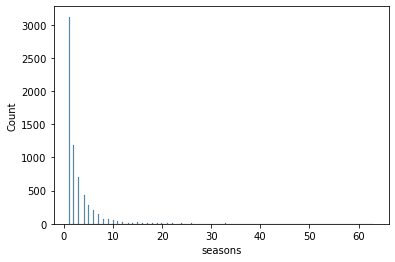

In [61]:
sns.histplot(titles_df.seasons)

There are a lot of shows with 1 season. I'm  not sure if that's because some movies are mismarked or because that many shows get dropped after 1 season.

<AxesSubplot:xlabel='release_year', ylabel='Count'>

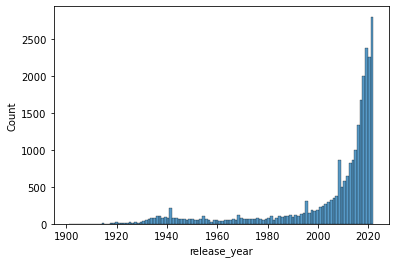

In [62]:
sns.histplot(titles_df.release_year.dropna())

I need to figure out where I might want to cut this off or if I do. If I'm looking at what's popular going forward, it might be worth dropping some of the older stuff.

<AxesSubplot:xlabel='age_certification', ylabel='Count'>

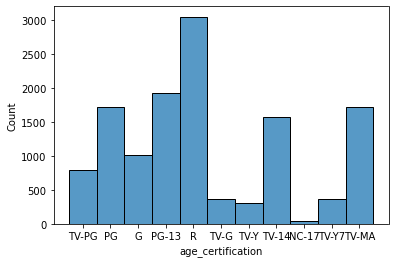

In [63]:
sns.histplot(titles_df.age_certification.dropna(), palette="Paired")

This was just to get a feel for what the distribution looked like.

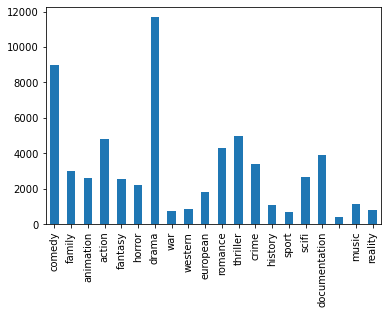

In [64]:
ax = genre_series.plot.bar()

<AxesSubplot:xlabel='imdb_score', ylabel='tmdb_score'>

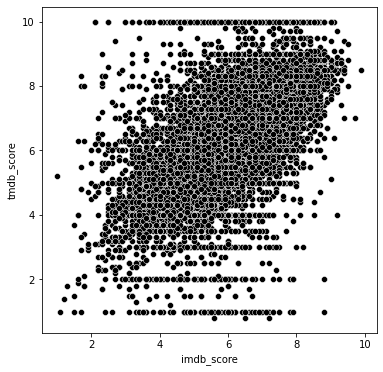

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(
    data=titles_df,
    x="imdb_score",
    y="tmdb_score",
    color="k",
    ax=ax,
)

It looks like there are many shows with a 10 in tmdb that vary greatly in their imdb scores. There also appear to be lines at each level. Not sure what's happening there.

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

1. I'm curious to see if the one season shows are really that numerous or if it's being skewed by shows that either recently started or mismarked movies. I'm also noticing that half the shows include drama in their genres - which leads me to wonder to what extent is that a useful descriptor.

2. The tmdb popularity score is still confusing to me. I also am not sure how I feel about lacking a count on the ratings for tmdb since small ratings counts could skew the data. I'm also a little unclear on whethere the imdb votes are a count or if they are a separate metric of some kind.

3. I need to look and see if I have duplicates across the services. I don't necessarily want to delete them but they might need to be pulled out for any ratings/credits analysis, depending on how many duplicates their are.


In [68]:
titles_df.to_csv(r"C:\Users\lizzc\Desktop\LaunchCode\VideoStreamingData\VideoStreamingProject\title_df.csv")
credits_df.to_csv(r"C:\Users\lizzc\Desktop\LaunchCode\VideoStreamingData\VideoStreamingProject\credits_df.csv")